In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns

Generamos un dataset sintético para cada inicial, extenso.

In [3]:
def char_range(a, b):
    for c in range(ord(a), ord(b)+1):
        yield chr(c)

def next(s):
    if s == '':
        return 'a'
    elif s[-1] != 'z':
        return s[:-1] + chr(ord(s[-1])+1)
    else:
        return next(s[:-1])+'a'

In [ ]:
n = 500000
for c in char_range('a', 'z'):
    word = ''
    f = open(f'../input/synthetic/{c}', 'w')
    for i in range(n):
        f.write(c + word + '\n')
        word = next(word)
    f.close()

Leemos los datos.

In [ ]:
times = []
for i in range(1,17):
    times += [pd.read_csv(f'../output/divisibilidad/time_{i}.csv')]
times = pd.concat(times)
times = times.groupby(['threads', 'buckets'], as_index=False)
times = times.mean().pivot('threads', 'buckets', 'maximo')

Graficamos los tiempos.

In [ ]:
sns.set_theme(font='serif')

ms_times = times * 1000
fig, ax = plt.subplots(1,2,figsize=(12,3))
sns.heatmap(ms_times, linewidths=0, cmap="magma_r", ax=ax[0], cbar_kws={'ticks': [50, 165, 280], 'label': 'tiempo(ms)'})
ax[0].set_aspect('equal')
ax[0].set(xlabel="buckets", ylabel="número de threads")
ax[0].set(xticks=np.array(list(range(1,26,2)))+0.5, yticks=np.array(list(range(3,16,4)))+0.5)
ax[0].set(xticklabels=np.array(list(range(2,27,2))), yticklabels=np.array(list(range(3,16,4)))+1)
ax[0].set(title="tiempos absolutos.")

normalized = times.sub(times.min(axis=1), axis=0)
normalized = normalized.div(normalized.max(axis=1), axis=0)
sns.heatmap(normalized, linewidths=0, cmap="magma_r", ax=ax[1], cbar_kws={'ticks': [0, 1], 'label': 'tiempo normalizado'})
ax[1].set_aspect('equal')
ax[1].set(xlabel="buckets", ylabel="número de threads")
ax[1].set(xticks=np.array(list(range(1,26,2)))+0.5, yticks=np.array(list(range(3,16,4)))+0.5)
ax[1].set(xticklabels=np.array(list(range(2,27,2))), yticklabels=np.array(list(range(3,16,4)))+1)
ax[1].set(title="tiempos relativos.")
plt.savefig('../figuras/numero_buckets.pdf', bbox_inches='tight')

In [96]:
times2k = pd.read_csv(f'../output/divisibilidad/2ksamples_2.csv')
times2k['maximo'] *= 1000
times3k = pd.read_csv(f'../output/divisibilidad/2ksamples_3.csv')
times3k['maximo'] *= 1000
times4k = pd.read_csv(f'../output/divisibilidad/2ksamples_4.csv')
times4k['maximo'] *= 1000
timeskk = pd.concat([times2k, times3k, times4k], ignore_index=True)

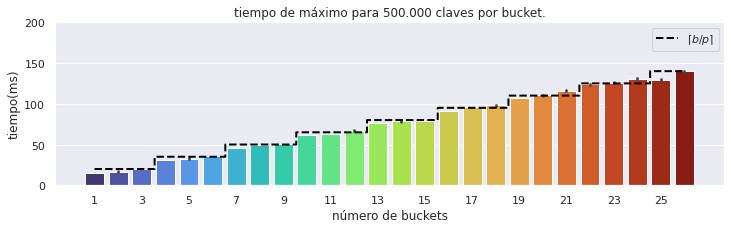

In [105]:
sns.set_theme(font='serif')
fig, ax = plt.subplots(1,1,figsize=(12,3))
#ax = sns.lineplot(data = timeskk, x='buckets', y='maximo', hue='threads', style='threads')
sns.barplot(
    data=times3k,
    x="buckets", y="maximo", palette="turbo", dodge=False
)
points = np.linspace(0.45, 25.5, 2650)
sns.lineplot(
    x=points-0.45, y=(points//3)*1.5e1+20, drawstyle='steps-pre', color='black', linewidth = 2, linestyle="dashed", label=r"$\left \lceil b/p \right \rceil$"
)
ax.set(xlabel="número de buckets", ylabel="tiempo(ms)")
ax.set(xticks=range(0,26,2), yticks=[0,50,100,150,200])
ax.set(title="tiempo de máximo para 500.000 claves por bucket.")
plt.savefig('../figuras/divisibilidad_2_threads.pdf', bbox_inches='tight')

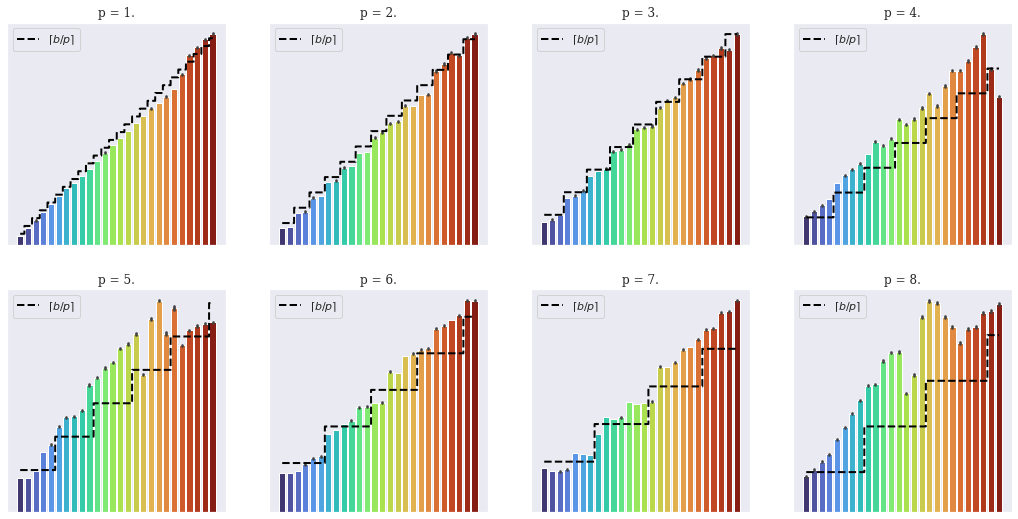

In [23]:
sns.set_theme(font='serif')
fig, ax = plt.subplots(2,4,figsize=(18,9))
constants = [1.4e1, 1.4e1, 1.5e1, 1.8e1,
             1.6e1, 1.5e1, 1.5e1, 2.3e1,
             1.7e1, 1.7e1, 1.7e1, 1.7e1,
             1.7e1, 1.7e1, 1.7e1, 1.7e1
        ]
#ax = sns.lineplot(data = timeskk, x='buckets', y='maximo', hue='threads', style='threads')
for i in range(2):
    for j in range(4):
        samples = pd.read_csv(f'../output/divisibilidad/2ksamples_{i*4+j+1}.csv')
        samples['maximo'] *= 1000
        sns.barplot(
            data=samples,
            x="buckets", y="maximo", palette="turbo", dodge=False, ax=ax[i][j]
        )
        points = np.linspace(0.45, 25.5, 2650)
        sns.lineplot(
            x=points-0.45, y=(points//(i*4+j+1))*constants[i*4+j]+20, drawstyle='steps-pre', color='black',
            linewidth = 2, linestyle="dashed", label=r"$\left \lceil b/p \right \rceil$", ax=ax[i][j]
        )
        #ax[i][j].set(xlabel="número de buckets", ylabel="tiempo(ms)")
        ax[i][j].set(xticks=[], xlabel=None, yticks=[], ylabel=None)
        ax[i][j].set(title=f"p = {i*4+j+1}.")
fig.set_label('hola')
plt.savefig('../figuras/divisibilidad_4x4.pdf', bbox_inches='tight')